# Problem - Given the public data from Universities. 

### -> Help student finding the right university for themselves.
### -> Help university know where they stand with competition.


## <center>K-means Clustering

### Import required packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 50)

## Load Dataset:

In [2]:
univ_df = pd.read_csv('Universities_Clustering.csv')
univ_df.shape
univ_df.head()
univ_df.describe()

(25, 8)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Harvard,MA,1400,91,14,11,39525,97
1,Yale,CT,1375,95,19,11,43514,96
2,Dartmouth,NH,1340,89,23,10,32162,95
3,Duke,NC,1315,90,30,12,31585,95
4,Princeton,NJ,1375,91,14,8,30220,95


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


# Preprocessing:

In [3]:
univ_df.set_index('Univ', inplace=True)
univ_df.drop(['State'], axis=1, inplace=True)

# while not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function

univ_df = univ_df.apply(lambda x: x.astype('float64'))
univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Harvard,1400.0,91.0,14.0,11.0,39525.0,97.0
Yale,1375.0,95.0,19.0,11.0,43514.0,96.0
Dartmouth,1340.0,89.0,23.0,10.0,32162.0,95.0
Duke,1315.0,90.0,30.0,12.0,31585.0,95.0
Princeton,1375.0,91.0,14.0,8.0,30220.0,95.0


## Scaling the features:

In [4]:
# Get column names first
names = univ_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_univ_df = scaler.fit_transform(univ_df)
scaled_univ_df = pd.DataFrame(scaled_univ_df, columns=names, index=univ_df.index)
scaled_univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Harvard,1.257977,0.762555,-1.303758,-0.43160,0.858743,1.158339
Yale,1.022507,0.972625,-1.045076,-0.43160,1.140982,1.045661
Dartmouth,0.692848,0.657519,-0.838130,-0.68253,0.337780,0.932982
Duke,0.457378,0.710037,-0.475975,-0.18067,0.296955,0.932982
Princeton,1.022507,0.762555,-1.303758,-1.18439,0.200376,0.932982


## Let's see how data looks across features:

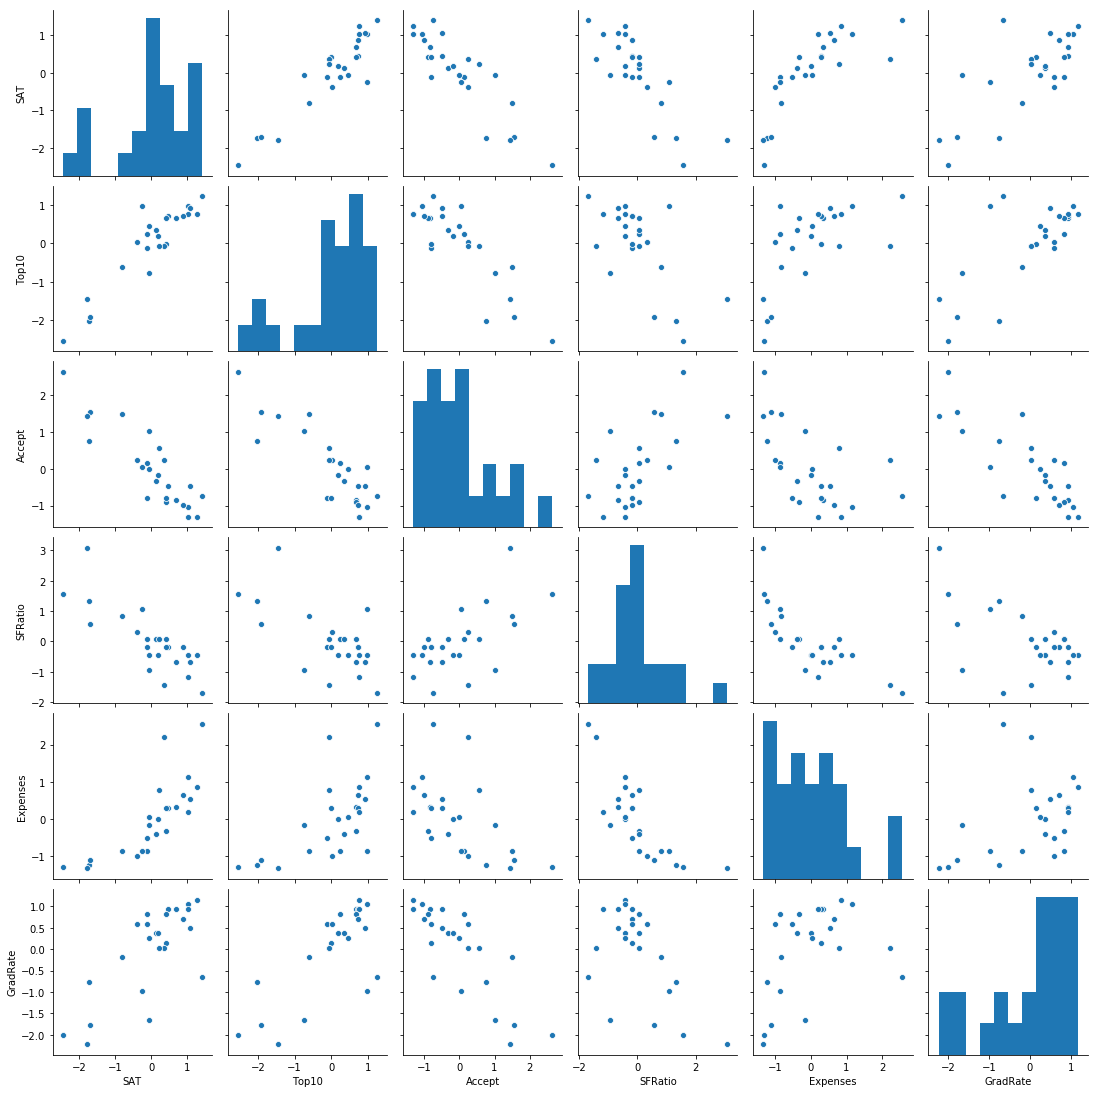

In [5]:
sns.pairplot(scaled_univ_df)

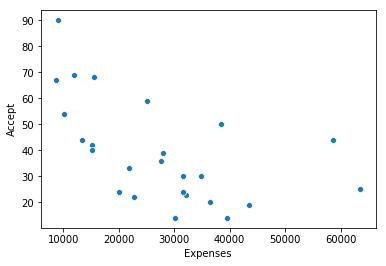

In [6]:
sns.scatterplot(x=univ_df.Expenses, y=univ_df.Accept)

## Perform K-Means clustering:

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_univ_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=scaled_univ_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Harvard, Yale, Dartmouth, Duke, Princeton, Brown, NotreDame, Stanford, Georgetown, UVA, MIT, Cornell, UPenn, Northwestern, Columbia, JohnsHopkins, UChicago, CalTech, UCBerkeley, CMU
1 :  UMichigan, PennState, UWisconsin, Purdue, TexasA&M


### Add Labels to the dataset

In [8]:
univ_df['Cluster'] = kmeans.labels_
univ_df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
Univ,,,,,,,
Harvard,1400.0,91.0,14.0,11.0,39525.0,97.0,0
Yale,1375.0,95.0,19.0,11.0,43514.0,96.0,0
Dartmouth,1340.0,89.0,23.0,10.0,32162.0,95.0,0
Duke,1315.0,90.0,30.0,12.0,31585.0,95.0,0
Princeton,1375.0,91.0,14.0,8.0,30220.0,95.0,0
Brown,1310.0,89.0,22.0,13.0,22704.0,94.0,0
NotreDame,1255.0,81.0,42.0,13.0,15122.0,94.0,0
Stanford,1360.0,90.0,20.0,12.0,36450.0,93.0,0
Georgetown,1255.0,74.0,24.0,12.0,20126.0,92.0,0


### Centroid of each Cluster

In [9]:
# Centroids created on standardised dataset
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_univ_df.columns)
centroids

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.426767,0.426442,-0.393197,-0.368867,0.288882,0.347051
1,-1.707066,-1.705769,1.572788,1.475469,-1.155529,-1.388204


In [10]:
# Centroids created on original dataset
metric_cols = univ_df.columns.tolist()
metric_cols.remove('Cluster')

centroids = univ_df.groupby('Cluster')[metric_cols].mean()
centroids

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1311.75,84.6,31.6,11.25,31470.9,89.8
1,1085.20,44.0,69.6,18.60,11056.4,74.4


### Visualising Centroids - Parallel Co-ordinate plot

<Figure size 720x432 with 0 Axes>

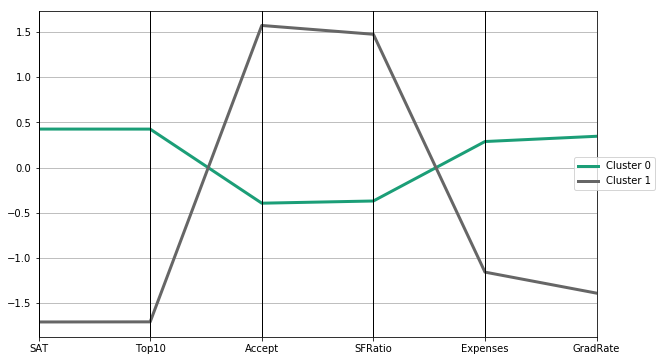

In [13]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_univ_df.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
# fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=3)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))

# Any Insights here????

## Let's see how our clusters look wrt. variables

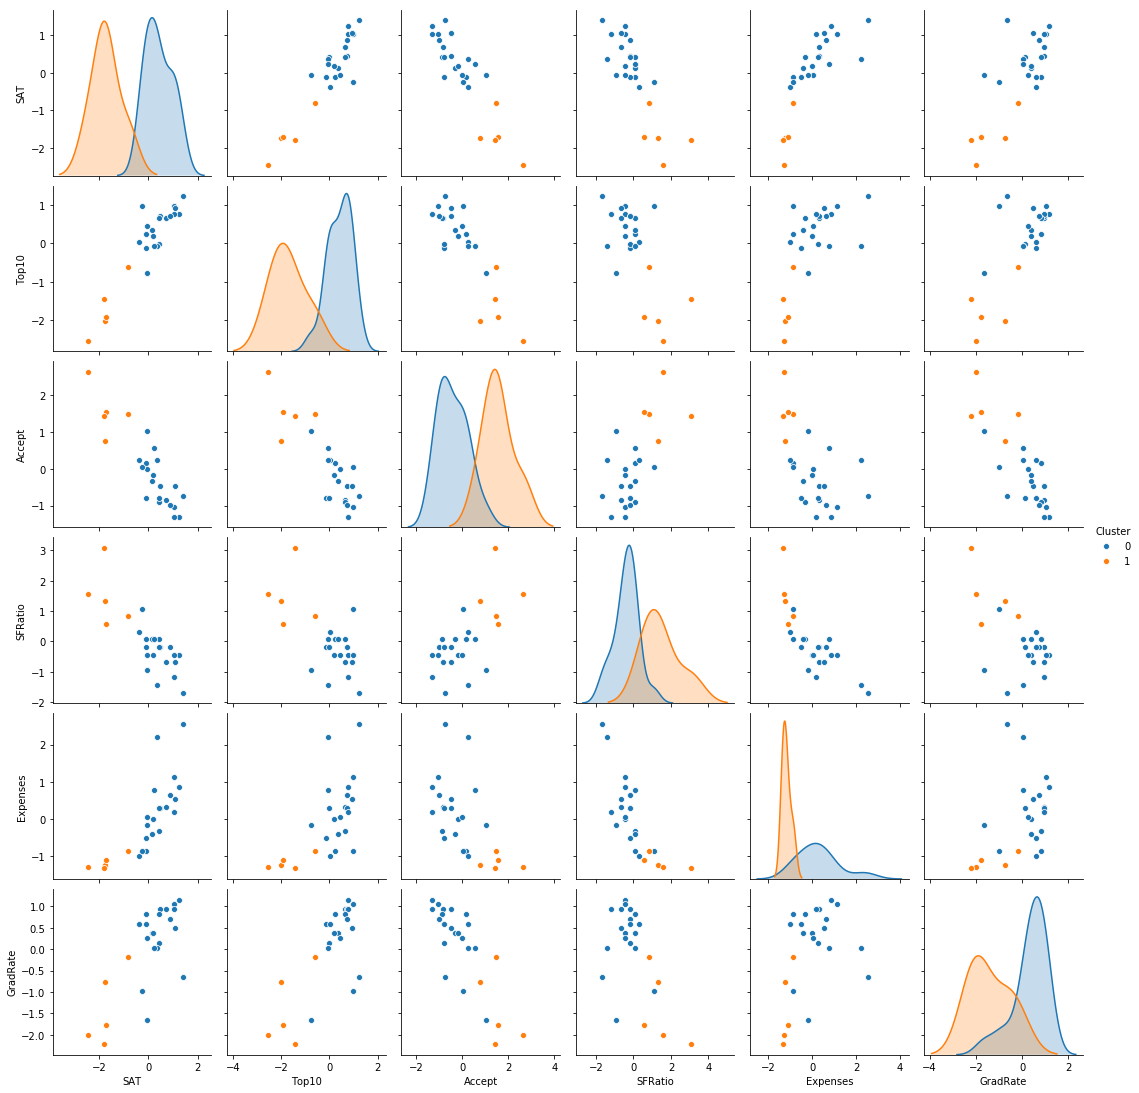

In [14]:
# pip3 install git+https://github.com/mwaskom/seaborn.git
scaled_univ_df_plot=scaled_univ_df.copy()
scaled_univ_df_plot['Cluster']=kmeans.labels_
sns.pairplot(scaled_univ_df_plot, hue="Cluster")

## Choosing the optimal number of clusters for K-means

In [15]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(scaled_univ_df)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=scaled_univ_df.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (20 members): 51.80 within cluster 
Cluster 1 (5 members): 12.35 within cluster 


## Elbow Method:

{2: 168.1425812879651, 3: 46.7506319066127, 4: 36.10472983848059, 5: 28.499664954585906, 6: 22.672206496052254, 7: 19.602335996058542, 8: 15.898973778746848, 9: 13.18366470633897}


Text(0.5, 1.0, 'Optimal Clusters - Elbow Method')

Text(0.5, 0, 'Number of cluster')

Text(0, 0.5, 'SSE')

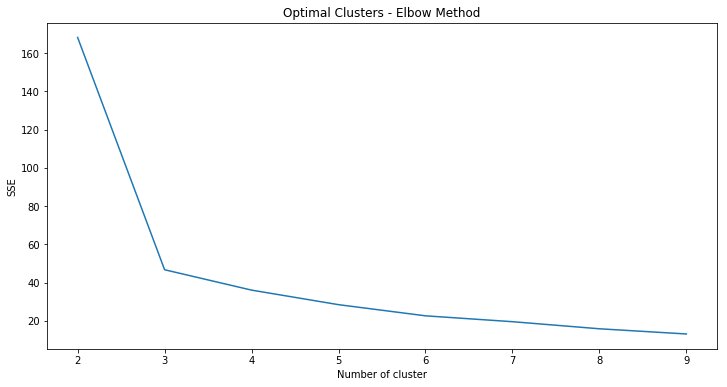

In [35]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_univ_df)
    scaled_univ_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_     # Inertia: Sum of squared distances of samples to their closest cluster center
print (sse)
fig = plt.figure(figsize=(12, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Optimal Clusters - Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [17]:
# Let's go back and try K=3

## <center> Agglomerative Clustering

In [18]:
univ_df = pd.read_csv('Universities_Clustering.csv')
univ_df.set_index('Univ', inplace=True)
univ_df.drop(['State'], axis=1, inplace=True)

# while not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
univ_df = univ_df.apply(lambda x: x.astype('float64'))
univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Harvard,1400.0,91.0,14.0,11.0,39525.0,97.0
Yale,1375.0,95.0,19.0,11.0,43514.0,96.0
Dartmouth,1340.0,89.0,23.0,10.0,32162.0,95.0
Duke,1315.0,90.0,30.0,12.0,31585.0,95.0
Princeton,1375.0,91.0,14.0,8.0,30220.0,95.0


### Distance Between Two Universities


In [19]:
d = pairwise.pairwise_distances(univ_df, metric='euclidean')
pd.DataFrame(d, columns=univ_df.index, index=univ_df.index).head(5)

# Another way to calculate distance
pd.DataFrame(squareform(pdist(univ_df, 'euclidean')), index=univ_df.index, columns= univ_df.index).head()

Univ,Harvard,Yale,Dartmouth,Duke,Princeton,Brown,NotreDame,Stanford,Georgetown,UVA,MIT,Cornell,UPenn,Northwestern,Columbia,JohnsHopkins,UChicago,UMichigan,CalTech,PennState,UCBerkeley,CMU,UWisconsin,Purdue,TexasA&M
Univ,,,,,,,,,,,,,,,,,,,,,,,,,
Harvard,0.000000,3989.083604,7363.250573,7940.471460,9305.034283,16821.243176,24403.449162,3075.268931,19399.552598,26176.606560,4655.075402,17661.421206,11972.579630,11473.885741,8015.530675,19166.268625,1150.991312,24056.084178,24050.014719,29341.815009,24385.547236,14499.796412,27669.907246,30461.734997,30822.805437
Yale,3989.083604,0.000000,11352.056334,11929.157095,13294.001918,20810.102787,28392.266500,7064.018474,23388.318174,30165.389091,8644.010007,21650.217204,15961.270971,15462.445408,12004.194767,15177.198391,5134.844399,28044.739400,20061.047630,33330.368375,28374.335270,18488.446068,31658.425656,34450.136821,34811.371088
Dartmouth,7363.250573,11352.056334,0.000000,577.588089,1942.338282,9458.048160,17040.224764,4288.048740,12036.310066,18813.367694,2708.312020,10298.183044,4609.358090,4110.816099,652.860628,26529.036469,6218.281274,16692.848798,31413.094897,21978.613719,17022.313209,7136.627425,20306.727161,23098.623509,23459.593645
Duke,7940.471460,11929.157095,577.588089,0.000000,1366.417945,8881.005180,16463.116230,4865.218803,11459.170214,18236.232451,3285.648490,9721.067328,4032.131694,3533.448316,77.012986,27106.011252,6795.096762,16115.633248,31990.161878,21401.362036,16445.184371,6559.395475,19729.457418,22521.315015,22882.346121
Princeton,9305.034283,13294.001918,1942.338282,1366.417945,0.000000,7516.287315,15098.507012,6230.022632,10094.733776,16871.700626,4650.033333,8356.568434,2668.637855,2171.210492,1291.787521,28471.107495,8160.543242,14751.416237,33355.030010,20037.275139,15080.639476,5195.599773,18365.459972,21157.484680,21518.222557


Univ,Harvard,Yale,Dartmouth,Duke,Princeton,Brown,NotreDame,Stanford,Georgetown,UVA,MIT,Cornell,UPenn,Northwestern,Columbia,JohnsHopkins,UChicago,UMichigan,CalTech,PennState,UCBerkeley,CMU,UWisconsin,Purdue,TexasA&M
Univ,,,,,,,,,,,,,,,,,,,,,,,,,
Harvard,0.000000,3989.083604,7363.250573,7940.471460,9305.034283,16821.243176,24403.449162,3075.268931,19399.552598,26176.606560,4655.075402,17661.421206,11972.579630,11473.885741,8015.530675,19166.268625,1150.991312,24056.084178,24050.014719,29341.815009,24385.547236,14499.796412,27669.907246,30461.734997,30822.805437
Yale,3989.083604,0.000000,11352.056334,11929.157095,13294.001918,20810.102787,28392.266500,7064.018474,23388.318174,30165.389091,8644.010007,21650.217204,15961.270971,15462.445408,12004.194767,15177.198391,5134.844399,28044.739400,20061.047630,33330.368375,28374.335270,18488.446068,31658.425656,34450.136821,34811.371088
Dartmouth,7363.250573,11352.056334,0.000000,577.588089,1942.338282,9458.048160,17040.224764,4288.048740,12036.310066,18813.367694,2708.312020,10298.183044,4609.358090,4110.816099,652.860628,26529.036469,6218.281274,16692.848798,31413.094897,21978.613719,17022.313209,7136.627425,20306.727161,23098.623509,23459.593645
Duke,7940.471460,11929.157095,577.588089,0.000000,1366.417945,8881.005180,16463.116230,4865.218803,11459.170214,18236.232451,3285.648490,9721.067328,4032.131694,3533.448316,77.012986,27106.011252,6795.096762,16115.633248,31990.161878,21401.362036,16445.184371,6559.395475,19729.457418,22521.315015,22882.346121
Princeton,9305.034283,13294.001918,1942.338282,1366.417945,0.000000,7516.287315,15098.507012,6230.022632,10094.733776,16871.700626,4650.033333,8356.568434,2668.637855,2171.210492,1291.787521,28471.107495,8160.543242,14751.416237,33355.030010,20037.275139,15080.639476,5195.599773,18365.459972,21157.484680,21518.222557


### Standardising the Variables

In [20]:
# Get column names first
names = univ_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_univ_df = scaler.fit_transform(univ_df)
scaled_univ_df = pd.DataFrame(scaled_univ_df, columns=names, index=univ_df.index)
scaled_univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Harvard,1.257977,0.762555,-1.303758,-0.43160,0.858743,1.158339
Yale,1.022507,0.972625,-1.045076,-0.43160,1.140982,1.045661
Dartmouth,0.692848,0.657519,-0.838130,-0.68253,0.337780,0.932982
Duke,0.457378,0.710037,-0.475975,-0.18067,0.296955,0.932982
Princeton,1.022507,0.762555,-1.303758,-1.18439,0.200376,0.932982


### Distance Between Two Universities (After Standardisation)

In [21]:
d_norm_scaled = pairwise.pairwise_distances(scaled_univ_df, metric='euclidean')
pd.DataFrame(d_norm_scaled, columns=univ_df.index, index=univ_df.index).head(5)

Univ,Harvard,Yale,Dartmouth,Duke,Princeton,Brown,NotreDame,Stanford,Georgetown,UVA,MIT,Cornell,UPenn,Northwestern,Columbia,JohnsHopkins,UChicago,UMichigan,CalTech,PennState,UCBerkeley,CMU,UWisconsin,Purdue,TexasA&M
Univ,,,,,,,,,,,,,,,,,,,,,,,,,
Harvard,0.000000,0.508770,0.965592,1.326009e+00,1.051843,1.638147,2.754424,0.744652,2.279094,3.159222,1.172200,2.203575,2.035223,2.232160,1.737758,2.834035,2.603180,4.501399,2.878763,5.667616,3.735192,4.326452,6.123395,7.673150,7.090710
Yale,0.508770,0.000000,0.985691,1.224844e+00,1.255060,1.723019,2.751756,0.720161,2.359065,3.144467,1.040810,2.185834,1.960898,2.082951,1.741929,2.529792,2.393471,4.396578,2.598619,5.639559,3.634288,4.211373,6.037841,7.566062,7.005189
Dartmouth,0.965592,0.985691,0.000000,6.655007e-01,0.779269,1.053437,1.953647,0.676041,1.534782,2.375787,0.762828,1.449597,1.196180,1.379032,1.193633,2.594650,2.070382,3.769779,3.046208,5.000155,3.156762,3.616868,5.385720,6.970497,6.534609
Duke,1.326009,1.224844,0.665501,2.107342e-08,1.422721,0.804233,1.536456,0.785229,1.376017,1.933976,0.963316,1.058944,0.955916,1.066138,1.123086,2.686818,1.689192,3.283731,3.332906,4.612307,2.726342,3.490029,5.048531,6.555177,6.052015
Princeton,1.051843,1.255060,0.779269,1.422721e+00,0.000000,1.557819,2.525824,1.171163,1.993498,2.958309,1.129389,2.045615,1.807632,1.998186,1.703223,2.912608,2.745186,4.408128,2.999873,5.555269,3.657641,3.978382,5.900691,7.549448,7.130012


### Agglomerative clustering - Single Linkage

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Single linkage)')

Text(0.5, 0, 'University')

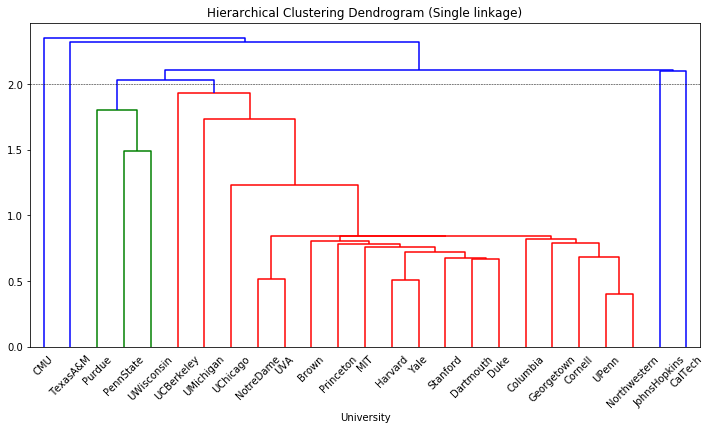

In [22]:
Z = linkage(scaled_univ_df, method='single')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=scaled_univ_df.index, color_threshold=2)
plt.axhline(y=2, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

### Agglomerative clustering - Average Linkage

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Average linkage)')

Text(0.5, 0, 'University')

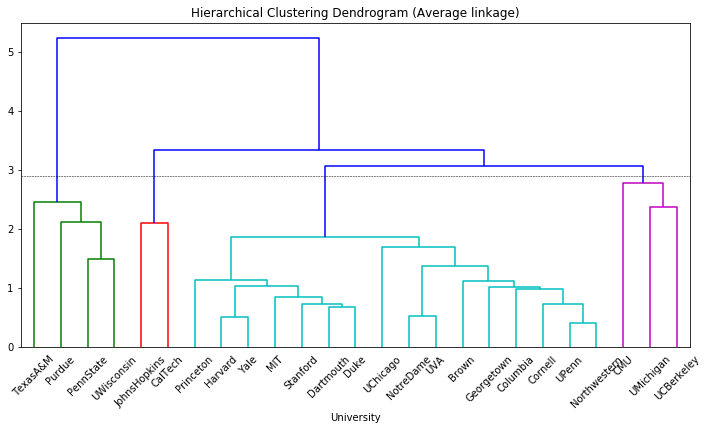

In [23]:
Z = linkage(scaled_univ_df, method='average')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=scaled_univ_df.index, color_threshold=2.9)
plt.axhline(y=2.9, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

### Agglomerative clustering - Complete Linkage

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Complete linkage)')

Text(0.5, 0, 'University')

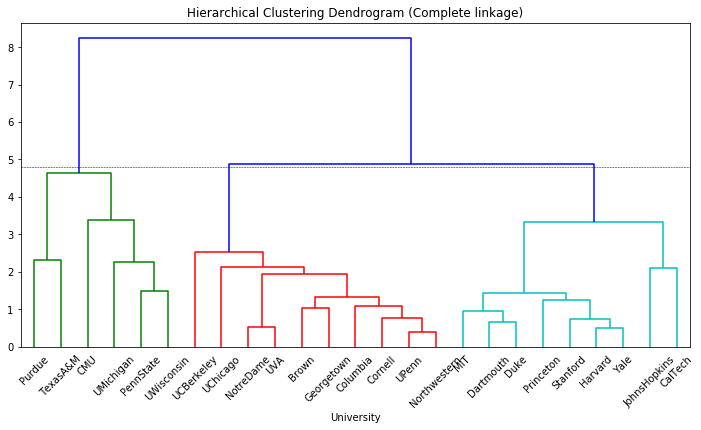

In [24]:
Z = linkage(scaled_univ_df, method='complete')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=scaled_univ_df.index, color_threshold=4.8)
plt.axhline(y=4.8, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

##### *Optimal number of clusters looks to be between 3 and 5


### From Dendrograms to Clusters

In [25]:
memb = fcluster(linkage(scaled_univ_df, 'complete'), 3, criterion='maxclust')
memb = pd.Series(memb, index=scaled_univ_df.index)
c= pd.DataFrame(memb).reset_index(drop=True)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  UMichigan, PennState, CMU, UWisconsin, Purdue, TexasA&M
2 :  Brown, NotreDame, Georgetown, UVA, Cornell, UPenn, Northwestern, Columbia, UChicago, UCBerkeley
3 :  Harvard, Yale, Dartmouth, Duke, Princeton, Stanford, MIT, JohnsHopkins, CalTech


### Let's see how our clusters look:

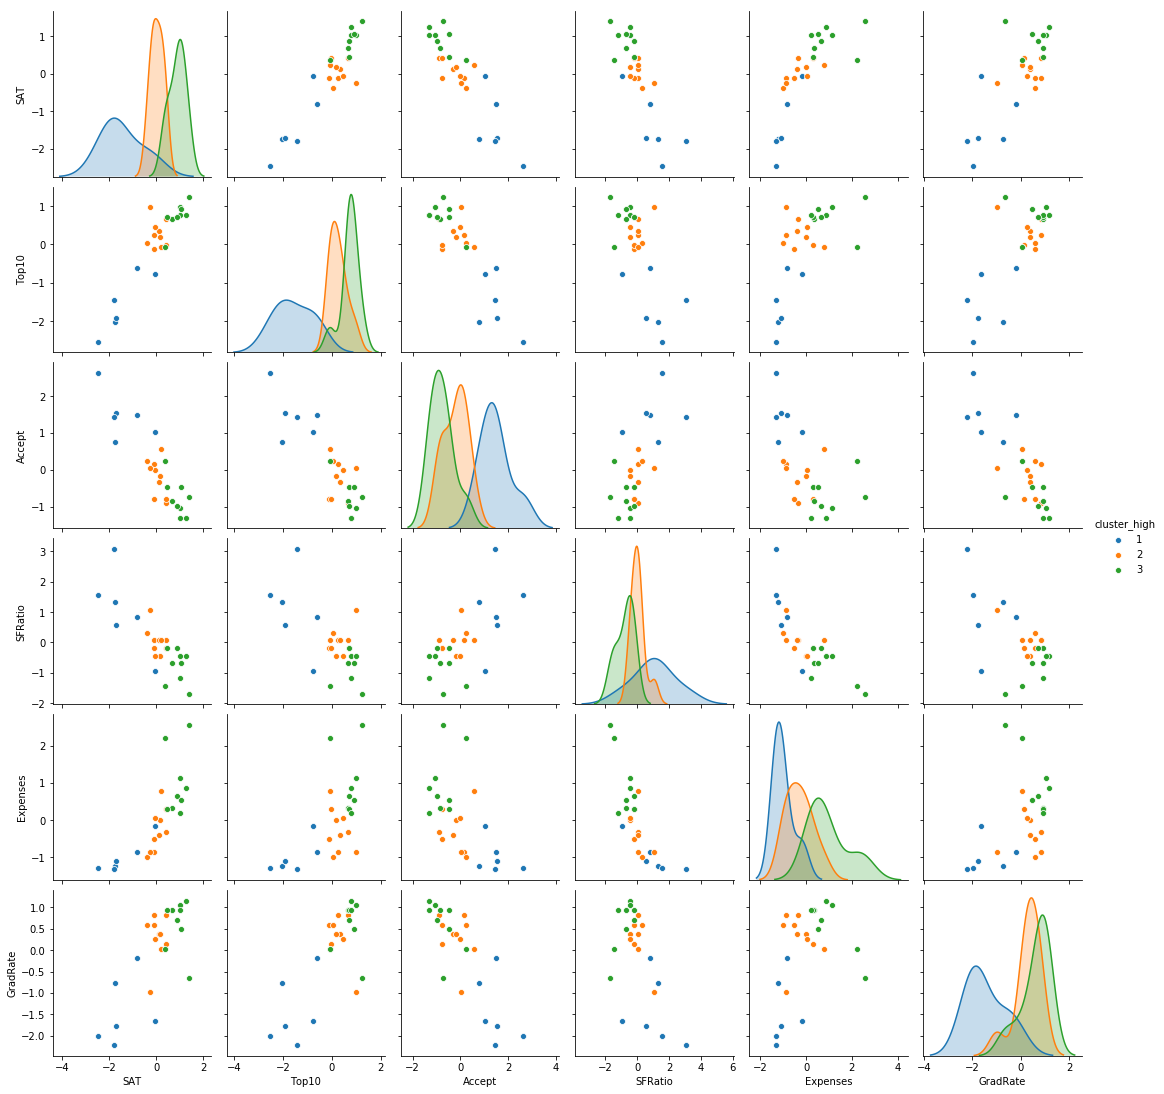

In [26]:
scaled_univ_df['cluster_high']=memb

sns.pairplot(scaled_univ_df, hue="cluster_high")

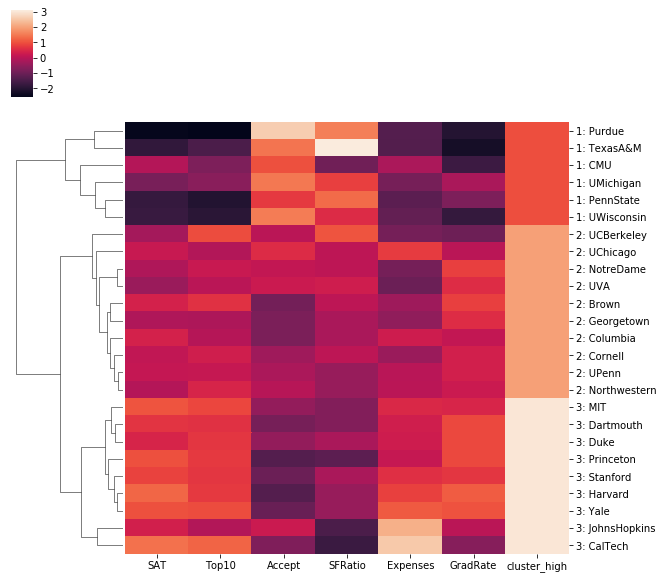

In [27]:
scaled_univ_df.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, scaled_univ_df.index)]
sns.clustermap(scaled_univ_df, method='complete', col_cluster=False)
plt.show()

# Any Insights here????

# <center> Let's see where only one wins:

,x,y
0,0.753483,0.445942
1,0.789048,0.042820
2,-0.152897,0.033344
3,1.968601,0.203137
4,0.873536,0.666406


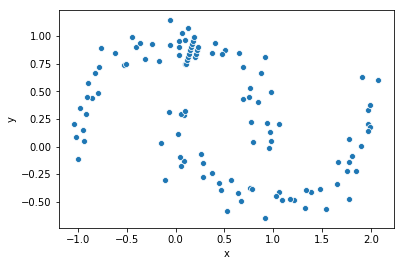

In [29]:
moon1=pd.read_csv('moon.csv')
moon1.head()
sns.scatterplot(moon1.x,moon1.y)

## K-means here:

In [30]:
#### Let's take 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(moon1)
memb = pd.Series(kmeans.labels_, index=moon1.index)
moon1['cluster']=memb
moon1

,x,y,cluster
0,0.753483,0.445942,1
1,0.789048,0.042820,1
2,-0.152897,0.033344,0
3,1.968601,0.203137,1
4,0.873536,0.666406,1
5,0.685372,0.431768,1
6,-0.065018,0.308209,0
7,1.990651,0.178487,1
8,0.285982,-0.152450,0
9,1.216120,-0.480935,1


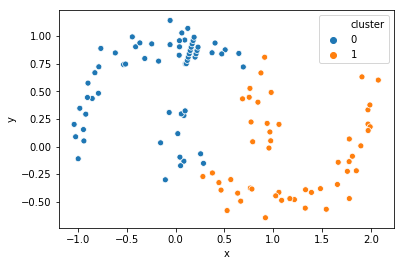

In [31]:
scaled_df_plot=moon1.copy()
sns.scatterplot(scaled_df_plot.x,scaled_df_plot.y, hue='cluster',data=scaled_df_plot)

## Any idea why is this happening??

# Let's try Agglomerative clustering here:

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (Single linkage)')

Text(0.5, 0, 'University')

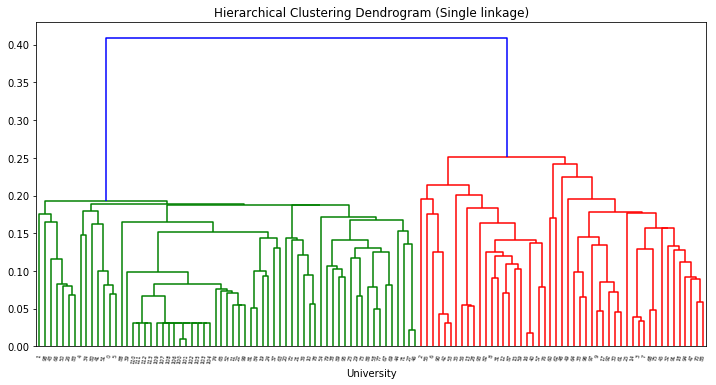

In [32]:
moon1=pd.read_csv('moon.csv')
Z = linkage(moon1, method='single')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.13)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('University')
dd = dendrogram(Z, labels=moon1.index, color_threshold=0.3, leaf_rotation= 80)
plt.axhline(y=4.8, color='black', linewidth=2.5, linestyle='dashed')
plt.show()

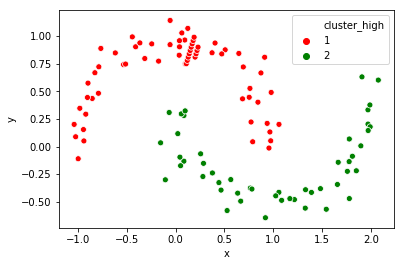

In [33]:
memb = fcluster(linkage(moon1, 'single'), 2, criterion='maxclust')
memb = pd.Series(memb, index=moon1.index)    
moon1['cluster_high']=memb

sns.scatterplot(moon1.x,moon1.y, hue="cluster_high",data=moon1,palette=['red','green'])

In [256]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ You reached here!! You killed it! ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~